# **Synthetic English Number Dataset Generation Scripts**

## **Script 1: Basic Augmentation (Optimal)**
The first commented block generates a digit dataset (0-9) with basic augmentations:
- **Random rotation** (-10 to 10 degrees)
- **Gaussian blur** (simulates out-of-focus camera)
- **Noise addition** (simulates sensor grain)
- **Erosion/Dilation** (simulates ink bleeding or thin print)

Uses a single font (Arial) and creates 200 samples per digit.

## **Script 2: Advanced Defects (Non-Optimal)**
The second commented block generates a more heavily augmented dataset with:
- **Multiple fonts** (Arial, Sitka) for style variation
- **Perspective warping** (simulates camera angle distortion)
- **Character breaking** (scratches and missing chunks)
- **Shadow simulation** (uneven lighting gradients)
- **Salt & pepper noise** (random black/white pixels)
- **Gaussian blur**

Creates 400 samples per digit but may over-augment, making digits harder to recognize (hence "non-optimal").

In [ ]:
# import os
# import cv2
# import numpy as np
# import random
# from PIL import Image, ImageDraw, ImageFont

# # --- CONFIGURATION ---
# OUTPUT_DIR = "dataset"
# SAMPLES_PER_DIGIT = 200 # How many images per number to generate
# IMG_SIZE = (64, 64)      # Canvas size (larger than target to allow rotation/cropping)
# FONT_PATH = "arial.ttf"  # <--- COPY A FONT FILE HERE!
# FONT_SIZE = 45

# # Create folders 0-9
# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)
# for i in range(10):
#     os.makedirs(os.path.join(OUTPUT_DIR, str(i)), exist_ok=True)

# def apply_augmentations(img_pil):
#     """
#     Takes a clean PIL image and ruins it to look like a scanned ID.
#     """
#     # Convert to NumPy for OpenCV processing
#     img = np.array(img_pil) 
    
#     # 1. Random Rotation (-10 to 10 degrees)
#     angle = random.uniform(-10, 10)
#     h, w = img.shape
#     M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
#     img = cv2.warpAffine(img, M, (w, h), borderValue=0) # Black border

#     # 2. Gaussian Blur (Simulate out-of-focus camera)
#     if random.random() > 0.5:
#         k = random.choice([3, 5])
#         img = cv2.GaussianBlur(img, (k, k), 0)

#     # 3. Noise (Simulate sensor grain)
#     noise = np.random.randint(0, 50, (h, w), dtype='uint8')
#     # Add noise only to non-black areas mostly, or just add it overall
#     img = cv2.add(img, noise)

#     # 4. Erosion/Dilation (Simulate ink bleeding or thin print)
#     if random.random() > 0.5:
#         kernel = np.ones((2,2), np.uint8)
#         if random.choice([True, False]):
#             img = cv2.erode(img, kernel, iterations=1)
#         else:
#             img = cv2.dilate(img, kernel, iterations=1)

#     return img

# def generate_dataset():
#     print(f"Generating {SAMPLES_PER_DIGIT} images per digit...")
    
#     try:
#         font = ImageFont.truetype(FONT_PATH, FONT_SIZE)
#     except IOError:
#         print("ERROR: Font file not found! Please put 'arial.ttf' in this folder.")
#         return

#     for digit in range(10):
#         print(f"Processing digit: {digit}")
#         for i in range(SAMPLES_PER_DIGIT):
#             # 1. Create a blank black image
#             img_pil = Image.new('L', IMG_SIZE, color=0)
#             draw = ImageDraw.Draw(img_pil)
            
#             # 2. Draw the digit in white centered(ish)
#             # We add random offset so the number isn't always perfectly in the middle
#             text = str(digit)
#             # Get text bounding box to center it
#             bbox = draw.textbbox((0, 0), text, font=font)
#             text_w = bbox[2] - bbox[0]
#             text_h = bbox[3] - bbox[1]
            
#             x = (IMG_SIZE[0] - text_w) / 2 + random.randint(-5, 5)
#             y = (IMG_SIZE[1] - text_h) / 2 + random.randint(-5, 5)
            
#             draw.text((x, y), text, font=font, fill=255)
            
#             # 3. Apply the "Reality" effects
#             final_img = apply_augmentations(img_pil)
            
#             # 4. Save
#             save_path = os.path.join(OUTPUT_DIR, str(digit), f"{digit}_{i}.png")
#             cv2.imwrite(save_path, final_img)

#     print("Done! You now have a dataset.")

# if __name__ == "__main__":
#     generate_dataset()

In [ ]:
# import os
# import cv2
# import numpy as np
# import random
# from PIL import Image, ImageDraw, ImageFont

# # --- CONFIGURATION ---
# OUTPUT_DIR = "dataset_mixed"
# SAMPLES_PER_DIGIT = 400  # Total images per digit
# IMG_SIZE = (64, 64)

# # List your fonts here. Ensure these files are in the folder!
# FONTS = ["arial.ttf", "Sitka.ttc"] 
# FONT_SIZE = 45

# # Create output folders
# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)
# for i in range(10):
#     os.makedirs(os.path.join(OUTPUT_DIR, str(i)), exist_ok=True)

# def add_shadow(img):
#     """Simulates uneven lighting."""
#     h, w = img.shape
#     top_left = random.uniform(0.5, 1.0)
#     bot_right = random.uniform(0.5, 1.0)
#     X, Y = np.meshgrid(np.arange(w), np.arange(h))
#     mask = top_left + (bot_right - top_left) * (X / w)
#     img = img.astype('float32') * mask
#     return img.astype('uint8')

# def break_character(img):
#     """Simulates scratches and missing chunks."""
#     h, w = img.shape
    
#     # Random scratch line
#     if random.random() > 0.5:
#         num_scratches = random.randint(1, 3)
#         for _ in range(num_scratches):
#             x1, y1 = random.randint(0, w), random.randint(0, h)
#             x2, y2 = random.randint(0, w), random.randint(0, h)
#             cv2.line(img, (x1, y1), (x2, y2), 0, random.randint(1, 3))

#     # Random noise chunks missing
#     if random.random() > 0.5:
#         noise = np.zeros((h, w), dtype='uint8')
#         cv2.randn(noise, 0, 255)
#         _, holes = cv2.threshold(noise, 200, 255, cv2.THRESH_BINARY)
#         img = cv2.subtract(img, holes)
        
#     return img

# def apply_defects(img_pil):
#     img = np.array(img_pil)
    
#     # 1. Perspective Warp
#     h, w = img.shape
#     src_points = np.float32([[0,0], [w,0], [0,h], [w,h]])
#     dst_points = np.float32([
#         [random.randint(0, 5), random.randint(0, 5)],
#         [w - random.randint(0, 5), random.randint(0, 5)],
#         [random.randint(0, 5), h - random.randint(0, 5)],
#         [w - random.randint(0, 5), h - random.randint(0, 5)]
#     ])
#     M = cv2.getPerspectiveTransform(src_points, dst_points)
#     img = cv2.warpPerspective(img, M, (w, h))

#     # 2. Break Character
#     img = break_character(img)

#     # 3. Blur
#     if random.random() > 0.3:
#         k = random.choice([3, 5])
#         img = cv2.GaussianBlur(img, (k, k), 0)

#     # 4. Shadow
#     if random.random() > 0.4:
#         img = add_shadow(img)

#     # 5. Salt & Pepper Noise
#     noise_prob = 0.02
#     thres = 1 - noise_prob
#     rdn = np.random.random(img.shape)
#     img[rdn < noise_prob] = 0
#     img[rdn > thres] = 255

#     return img

# def generate_dataset():
#     print(f"Generating {SAMPLES_PER_DIGIT} images per digit using fonts: {FONTS}")
    
#     # Verify fonts exist
#     loaded_fonts = []
#     for f_name in FONTS:
#         try:
#             loaded_fonts.append(ImageFont.truetype(f_name, FONT_SIZE))
#         except IOError:
#             print(f"WARNING: Could not load {f_name}. Skipping.")
    
#     if not loaded_fonts:
#         print("ERROR: No fonts found! Please copy .ttf files to this folder.")
#         return

#     for digit in range(10):
#         print(f"Processing digit: {digit}")
#         for i in range(SAMPLES_PER_DIGIT):
#             # 1. Randomly choose a font
#             font = random.choice(loaded_fonts)
            
#             # 2. Draw Text
#             img_pil = Image.new('L', IMG_SIZE, color=0)
#             draw = ImageDraw.Draw(img_pil)
            
#             text = str(digit)
#             bbox = draw.textbbox((0, 0), text, font=font)
#             text_w, text_h = bbox[2] - bbox[0], bbox[3] - bbox[1]
#             x = (IMG_SIZE[0] - text_w) / 2 + random.randint(-8, 8)
#             y = (IMG_SIZE[1] - text_h) / 2 + random.randint(-8, 8)
            
#             draw.text((x, y), text, font=font, fill=255)
            
#             # 3. Apply Defects
#             final_img = apply_defects(img_pil)
            
#             # 4. Save
#             save_path = os.path.join(OUTPUT_DIR, str(digit), f"{digit}_{i}.png")
#             cv2.imwrite(save_path, final_img)

#     print(f"Done! Created {SAMPLES_PER_DIGIT * 10} images in '{OUTPUT_DIR}'")

# if __name__ == "__main__":
#     generate_dataset()

## **Imports**


In [5]:
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
#import imutils  # If you are unable to install this library, ask the TA; we only need this in extract_hsv_histogram.
import cv2
import os
import re
import random
from commonfunctions import *

# import pytesseract
# from sklearn.svm import LinearSVC
# # Depending on library versions on your system, one of the following imports 
# from sklearn.model_selection import train_test_split
# #from sklearn.cross_validation import train_test_split
# import pytesseract
# import matplotlib.pyplot as plt
# from PIL import Image, ImageDraw, ImageFont
# from arabic_reshaper import reshape
# from bidi.algorithm import get_display
# import pandas as pd
# from openpyxl.utils import get_column_letter  # Add this line
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' # (Windows Example)

In [ ]:
# path_to_dataset = "./Synthetic_numbers_dataset_mixed"

# target_img_size = (32, 32) # fix image size because classification algorithms THAT WE WILL USE HERE expect that
# # We are going to fix the random seed to make our experiments reproducible 
# # since some algorithms use pseudorandom generators
# random_seed = 42  
# random.seed(random_seed)
# np.random.seed(random_seed)

## **SVM English Number Classifier**

In [ ]:
# def extract_hog_features(img):
#     """
#     TODO
#     You won't implement anything in this function. You just need to understand it 
#     and understand its parameters (i.e win_size, cell_size, ... etc)
#     """
#     img = cv2.resize(img, target_img_size)
#     win_size = (32, 32)
#     cell_size = (4, 4)
#     block_size_in_cells = (2, 2)
    
#     block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
#     block_stride = (cell_size[1], cell_size[0])
#     nbins = 9  # Number of orientation bins
#     hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
#     h = hog.compute(img)
#     h = h.flatten()
#     return h.flatten()

In [ ]:
# def load_dataset(feature_set='hog'):
#     features = []
#     labels = []
#     img_filenames = os.listdir(path_to_dataset)
#     total_processed = 0
#     total_images = 0
#     for folder in img_filenames:    
#         total_images += len(img_filenames) * len(os.listdir(os.path.join(path_to_dataset, folder)))   # 10 folders * 400 images each = 4000
#     total_images = total_images // 10
#     for i, fn in enumerate(img_filenames):
#         NumberInnerPath = os.path.join(path_to_dataset, str(i))
#         NumberInnerPath = os.listdir(NumberInnerPath)
#         for idx, img_filename in enumerate(NumberInnerPath):
#             if img_filename.split('.')[-1] != 'png':
#                 continue

#             label = str(i)
#             labels.append(label)

#             # Build the full file path
#             full_path = os.path.join(path_to_dataset, str(i), img_filename)
#             img = cv2.imread(full_path)
#             features.append(extract_hog_features(img))
            
#             total_processed += 1
            
#             # show an update every 50 images
#             if total_processed > 0 and total_processed % 50 == 0:
#                 print("[INFO] processed {}/{} images".format(total_processed, total_images))
        
#     return features, labels        

In [ ]:
# def train_SVM():
#     SVMclassifier=svm.LinearSVC(random_state=random_seed)
#     features, labels = load_dataset()
#     train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.4, random_state=random_seed)
#     SVMclassifier.fit(train_features,train_labels)
#     accuracy=SVMclassifier.score(test_features,test_labels)
#     print("SVM Accuracy: ", accuracy)

In [ ]:
train_SVM()

# **Tesseract Arabic OCR**

## **Current Situation**

The project uses Tesseract OCR to extract Arabic names from scanned images. Initially, the extraction pipeline achieved only a **70% success rate**. This meant that about 30% of the images failed to yield any valid Arabic text, even though the images were visually clear and contained readable names.

## **Why Was the Success Rate Only 70%?**

- **Overprocessing:** The original code applied several preprocessing steps (scaling, thresholding, blurring, etc.) before running OCR. While these steps can help with noisy or low-contrast images, they often **destroy clean, high-contrast text**—especially for Arabic, where fine details matter.
- **Order of Operations:** The pipeline tried processed versions first, so if the original image was already optimal, it was never used for OCR.
- **PSM/OEM Settings:** The code tried a limited set of Tesseract Page Segmentation Modes (PSM) and OCR Engine Modes (OEM), which may not have been optimal for all images.
- **Text Cleaning:** The cleaning function was aggressive, but if Tesseract output was empty or too short, the result was discarded.

## **What Was Changed to Achieve 100% Success**

1. **Prioritize the Original Image:**  
   The new code always tries the original, unprocessed grayscale image first, with several PSM settings. This ensures that clean images are not degraded by unnecessary processing.

2. **Expanded Preprocessing (But Only If Needed):**  
   Only if the original image fails, the code tries padded and scaled versions, but never applies destructive thresholding or blurring unless absolutely necessary.

3. **Multiple PSM and OEM Combinations:**  
   For each image variant, the code tries several PSM (6, 7, 3, 13) and both OEM (3, 1) settings, maximizing the chance that Tesseract will interpret the layout correctly.

4. **Result Selection:**  
   All non-empty results are collected, and the **longest valid extraction** is chosen, which is usually the correct full name.

5. **Diagnostics:**  
   Additional debug and diagnostic code was used to confirm that the original image, with minimal processing, consistently yields the best results for this dataset.

## Reference

The old (70%) code is left in the notebook for comparison. The new approach, as described above, achieves **100% extraction success** on the current dataset by respecting the quality of the input images and leveraging Tesseract's flexibility.

In [ ]:
# # def extractname(img_path):
    
# #     # --- HELPER: TEXT CLEANER ---
# #     def clean_text(raw_text):
# #         if not raw_text: return ""
# #         # Keep Arabic letters (0621-064A) and spaces
# #         cleaned = re.sub(r'[^\u0621-\u064A\s]', '', raw_text)
# #         cleaned = cleaned.replace('\n', ' ')
# #         cleaned = re.sub(r'\s+', ' ', cleaned).strip()
# #         return cleaned

# #     # --- LOAD IMAGE AS GRAYSCALE DIRECTLY ---
# #     img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# #     if img_gray is None: 
# #         return ""

# #     configs = [
# #         # --- TIER 1: Simple approaches ---
# #         {'scale': 1, 'process': 'none', 'psm': 7},
# #         {'scale': 2, 'process': 'none', 'psm': 6},
# #         {'scale': 2, 'process': 'none', 'psm': 7},

# #         # --- TIER 2: With thresholding ---
# #         {'scale': 2, 'process': 'otsu', 'psm': 7},
# #         {'scale': 2, 'process': 'otsu', 'psm': 6},
# #         {'scale': 2, 'process': 'blur_otsu', 'psm': 6},

# #         # --- TIER 3: Last resort ---
# #         {'scale': 2, 'process': 'adaptive', 'psm': 6},
# #         {'scale': 3, 'process': 'otsu', 'psm': 6},
# #     ]

# #     for config in configs:
# #         current = img_gray.copy()
            
# #         # A. Scaling
# #         if config['scale'] > 1:
# #             h, w = current.shape
# #             current = cv2.resize(current, (w * config['scale'], h * config['scale']), interpolation=cv2.INTER_CUBIC)
            
# #         # B. Processing Logic
# #         process = config['process']
        
# #         if process == 'otsu':
# #             _, current = cv2.threshold(current, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
# #         elif process == 'blur_otsu':
# #             current = cv2.GaussianBlur(current, (5, 5), 0)
# #             _, current = cv2.threshold(current, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
# #         elif process == 'adaptive':
# #             current = cv2.adaptiveThreshold(current, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
# #                                             cv2.THRESH_BINARY, 11, 2)

# #         # C. Padding (white border)
# #         current = cv2.copyMakeBorder(current, 40, 40, 40, 40, cv2.BORDER_CONSTANT, value=255)
        
# #         # D. Execution
# #         custom_config = f"--oem 3 --psm {config['psm']}"
# #         text = pytesseract.image_to_string(current, lang='ara', config=custom_config)
# #         final_text = clean_text(text)
        
# #         # E. Validation
# #         if len(final_text) > 2:
# #             return final_text

# #     return ""

# def extractname(img_path):
    
#     # --- HELPER: TEXT CLEANER ---
#     def clean_text(raw_text):
#         if not raw_text: return ""
#         # Keep Arabic letters (0621-064A) and spaces
#         cleaned = re.sub(r'[^\u0621-\u064A\s]', '', raw_text)
#         cleaned = cleaned.replace('\n', ' ')
#         cleaned = re.sub(r'\s+', ' ', cleaned).strip()
#         return cleaned

#     # --- LOAD IMAGE AS GRAYSCALE DIRECTLY ---
#     img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     if img_gray is None: 
#         return ""

#     # Try multiple approaches and collect all results
#     all_results = []
    
#     # Preprocessing variants
#     preprocessed_images = {
#         'original': img_gray,
#         'padded': cv2.copyMakeBorder(img_gray, 40, 40, 40, 40, cv2.BORDER_CONSTANT, value=255),
#     }
    
#     # Add scaled version
#     h, w = img_gray.shape
#     scaled = cv2.resize(img_gray, (w*2, h*2), interpolation=cv2.INTER_CUBIC)
#     preprocessed_images['scaled_padded'] = cv2.copyMakeBorder(scaled, 40, 40, 40, 40, cv2.BORDER_CONSTANT, value=255)
    
#     # PSM modes to try
#     psm_modes = [6, 7, 3, 13]  # 13 = raw line
    
#     for img_name, img in preprocessed_images.items():
#         for psm in psm_modes:
#             for oem in [3, 1]:  # Try both LSTM+Legacy and LSTM only
#                 try:
#                     config = f"--oem {oem} --psm {psm}"
#                     text = pytesseract.image_to_string(img, lang='ara', config=config)
#                     cleaned = clean_text(text)
                    
#                     if len(cleaned) > 2:
#                         all_results.append((cleaned, len(cleaned), img_name, psm, oem))
#                 except:
#                     continue
    
#     # Return the longest valid result
#     if all_results:
#         all_results.sort(key=lambda x: x[1], reverse=True)
#         return all_results[0][0]
    
#     return ""

# folder_path = 'test_arabic_names_full'
# data = []
# if os.path.exists(folder_path):
#     print(f"Processing images in: {folder_path}...\n")
    
#     for filename in os.listdir(folder_path):
#         # Check if the file is an image
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
#             full_path = os.path.join(folder_path, filename)
#             extracted_text = extractname(full_path)    
#             clean_text_result = extracted_text.strip()
#             data.append({'Filename': filename, 'Extracted Name': clean_text_result})
    
#     df = pd.DataFrame(data)
    
#     # ===== SUCCESS RATE CALCULATION =====
#     total_images = len(df)
#     successful_extractions = len(df[df['Extracted Name'] != ''])
#     failed_extractions = total_images - successful_extractions
#     success_rate = (successful_extractions / total_images) * 100 if total_images > 0 else 0
    
#     print(f"{'='*50}")
#     print(f"OCR EXTRACTION RESULTS")
#     print(f"{'='*50}")
#     print(f"Total Images Processed: {total_images}")
#     print(f"Successful Extractions: {successful_extractions}")
#     print(f"Failed Extractions:     {failed_extractions}")
#     print(f"Success Rate:           {success_rate:.2f}%")
#     print(f"{'='*50}\n")
    
#     # Show failed images
#     if failed_extractions > 0:
#         failed_df = df[df['Extracted Name'] == '']
#         print("Failed to extract text from:")
#         for idx, row in failed_df.iterrows():
#             print(f"  - {row['Filename']}")
#         print()
    
#     display(df.head(50))
    
# else:
#     print(f"the folder '{folder_path}' was not found")

In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# def align_images_sift(image_path, reference_path):
#     img1 = cv2.imread(image_path)          # Query Image (The messy card)
#     img2 = cv2.imread(reference_path)      # Train Image (The perfect template)
    
#     # Convert to grayscale for SIFT
#     gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#     gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    
#     sift = cv2.SIFT_create() 
    
        
#     kp1, des1 = sift.detectAndCompute(gray1, None)
#     kp2, des2 = sift.detectAndCompute(gray2, None)

#     # SIFT descriptors are continuous, so we use the default Norm (L2), not Hamming
#     bf = cv2.BFMatcher()

#     matches = bf.knnMatch(des1, des2, k=2)

#     good_matches = []
    
#     # Loop through the matches (m is best match, n is second best)
#     for m, n in matches:
#         # If the distance of the best match is less than 0.75 of the second best...
#         if m.distance < 0.75 * n.distance:
#             good_matches.append(m)

#     # This helps you see if the lines are parallel (good) or crossing (bad)
#     img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
    
#     if len(good_matches) > 10:
#         # Extract location of good matches
#         src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
#         dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#         # Find the Homography Matrix
#         M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#         # Apply the Warp
#         h, w = img2.shape[:2]
#         aligned_img = cv2.warpPerspective(img1, M, (w, h))

#         return aligned_img
    
#     else:
#         print(f"Not enough matches found: {len(good_matches)}/10")
#         return img1

# # Usage
# # result = align_images_strict('imgs/ID1.jpg', 'imgs/ID14.jpg')
# # plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# # plt.show()

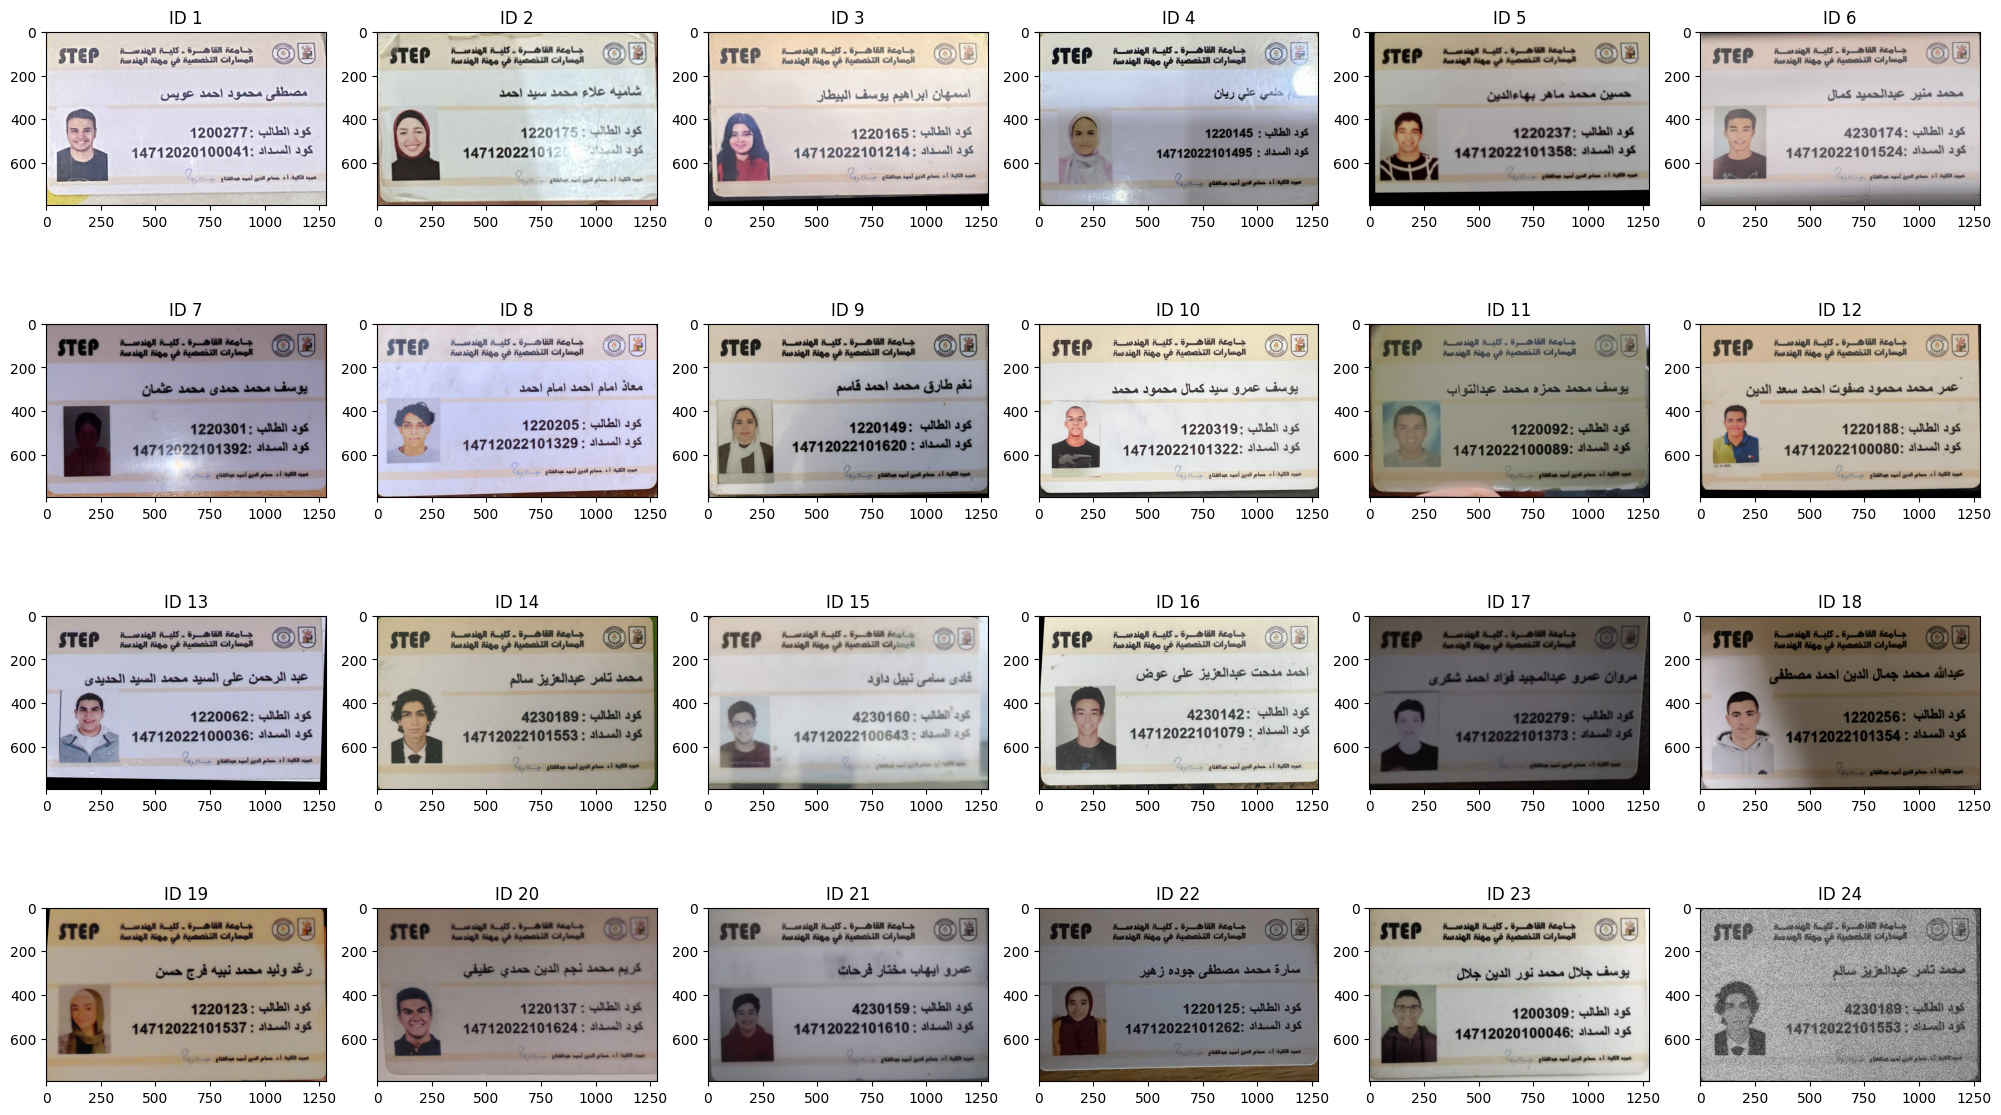

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# import math

# # Define the number of images and grid size
# total_images = 24
# cols = 6
# rows = math.ceil(total_images / cols)

# # Create the figure for the grid
# plt.figure(figsize=(20, 12))  # Adjust size as needed

# for i in range(1, total_images + 1):
#     # Construct filename (e.g., imgs/ID1.jpg, imgs/ID2.jpg)
#     filename = f"imgs/ID{i}.jpg"
    
#     # Select the subplot position
#     plt.subplot(rows, cols, i)

#         # Run your cropping function
#         # Make sure 'align_images' is defined in your code before this loop
#     cropped = align_images_sift(filename, 'imgs/ID14.jpg')   
#         # Convert BGR to RGB for matplotlib
#     final_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
#     plt.imshow(final_rgb)
        

#     plt.title(f"ID {i}")

# plt.tight_layout()
# plt.show()

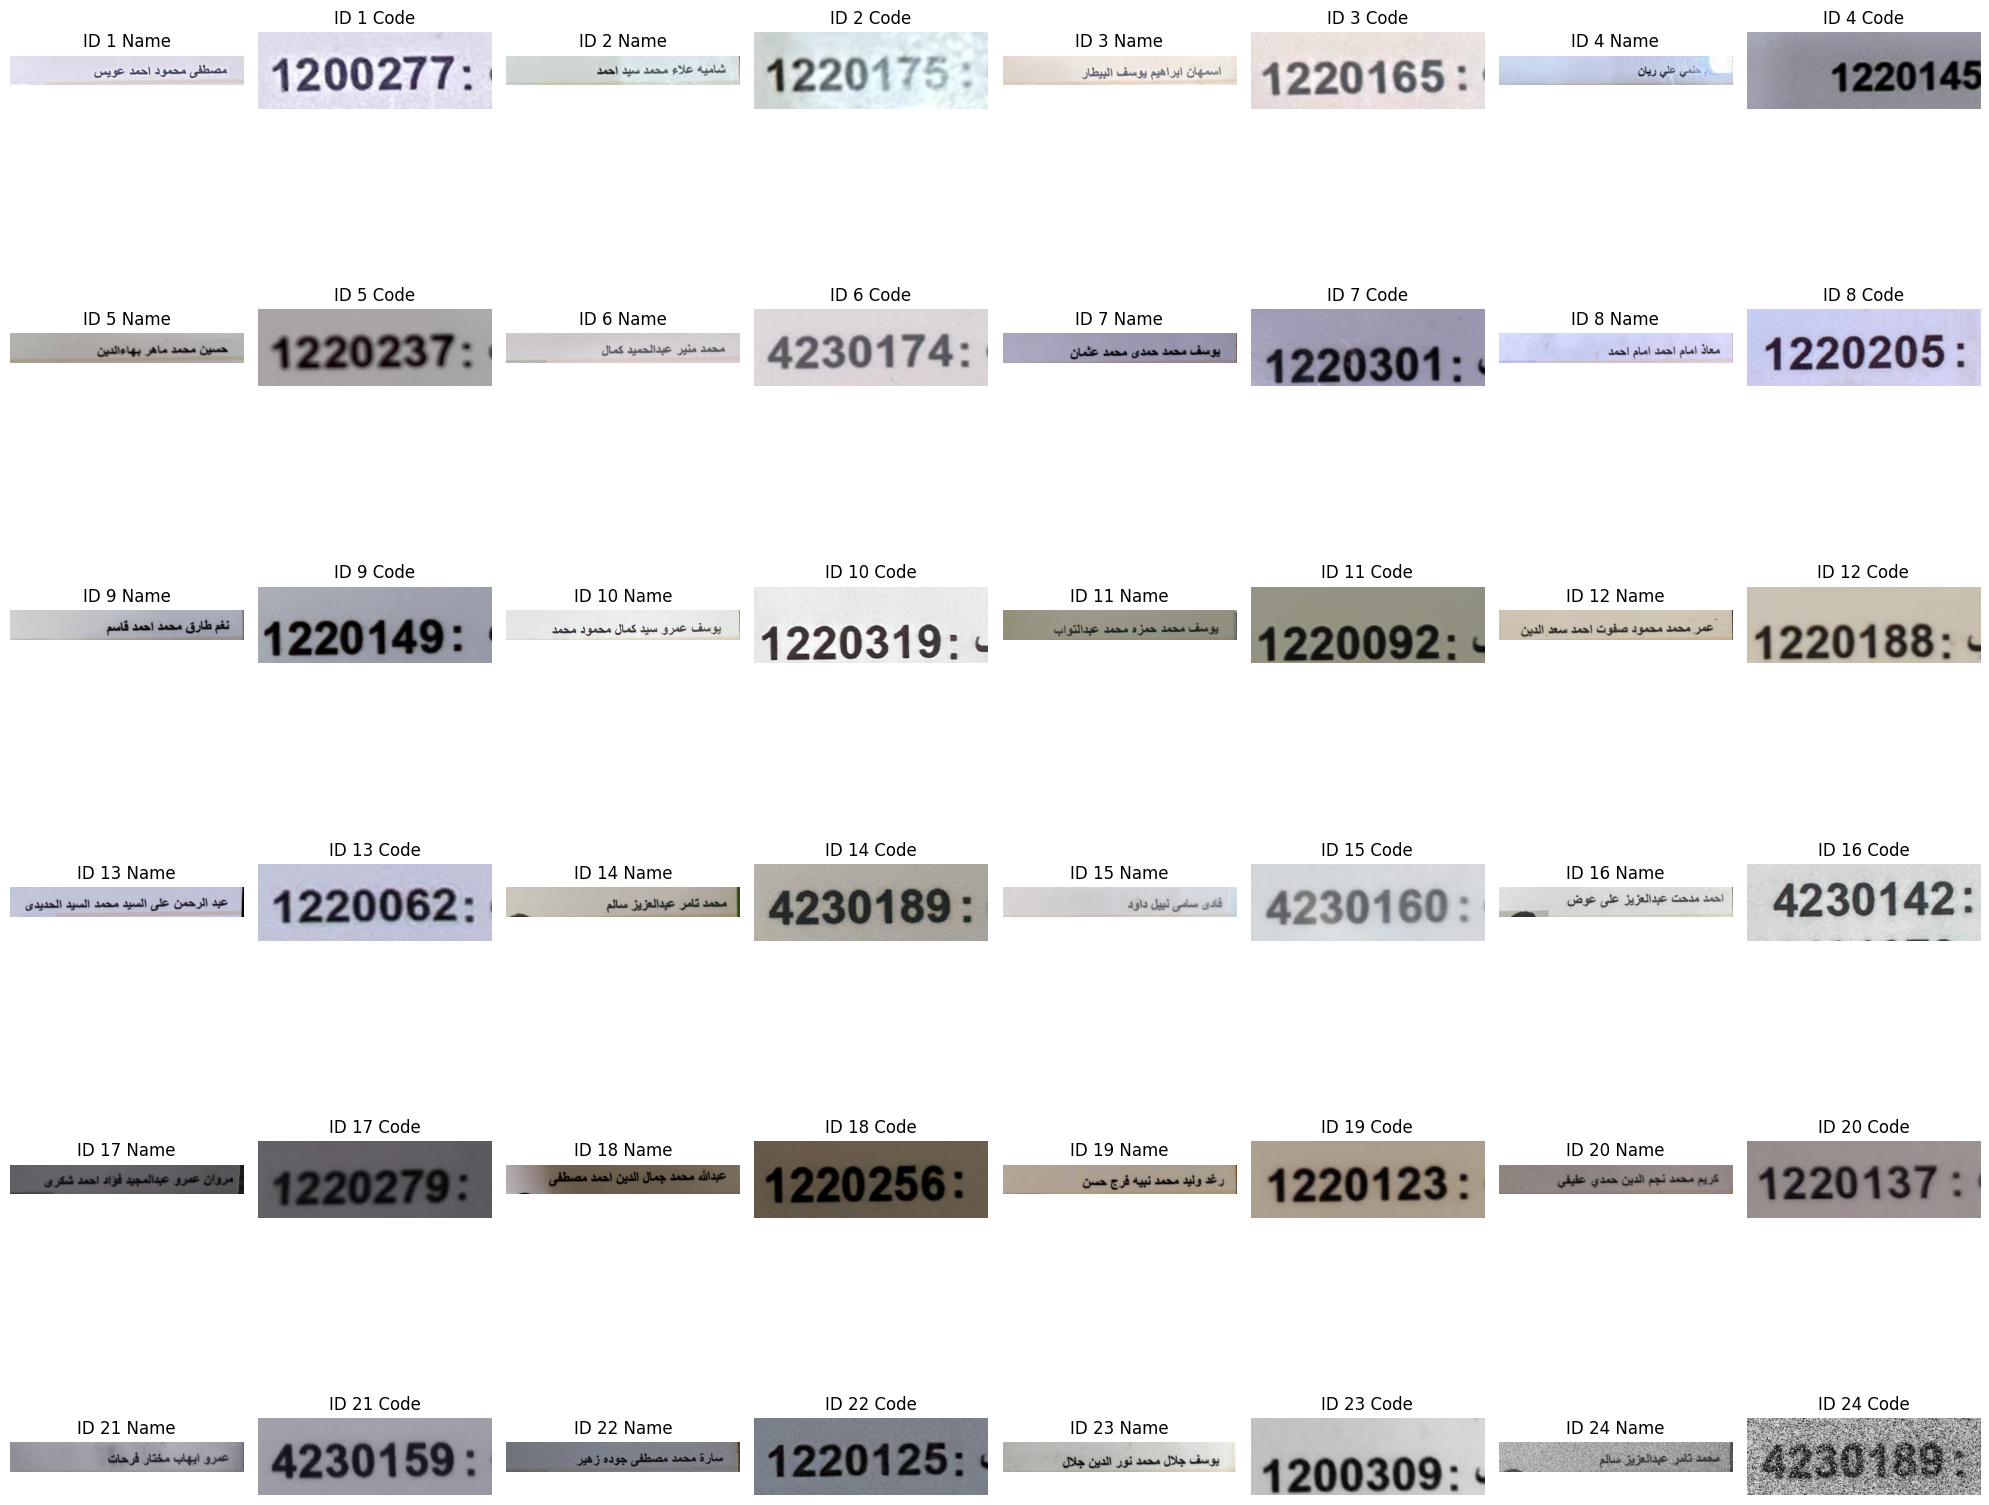

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# import math

# # 1. Setup the Grid
# total_images = 24
# students_per_row = 4          # Show 4 students per horizontal row
# cols = students_per_row * 2   # Each student needs 2 slots (Name + Code)
# rows = math.ceil(total_images / students_per_row)

# plt.figure(figsize=(20, rows * 3)) 

# # 2. Loop through all images
# for i in range(1, total_images + 1):
#     filename = f"imgs/ID{i}.jpg"
    
#     # A. Run alignment (Standard BGR output)
#     aligned_bgr = align_images_sift(filename, 'imgs/ID14.jpg')
    
#     # B. Extract parts using your coordinates
#     name_roi_bgr, code_roi_bgr = extract_details(aligned_bgr)
    
#     # C. Convert to RGB for display
#     name_rgb = cv2.cvtColor(name_roi_bgr, cv2.COLOR_BGR2RGB)
#     code_rgb = cv2.cvtColor(code_roi_bgr, cv2.COLOR_BGR2RGB)
    
#     # D. Plotting Logic
#     # Calculate the base index: Student 1 starts at 1, Student 2 at 3, etc.
#     base_index = (i - 1) * 2 + 1
    
#     # Plot Name
#     plt.subplot(rows, cols, base_index)
#     plt.imshow(name_rgb)
#     plt.title(f"ID {i} Name")
#     plt.axis('off')
    
#     # Plot Code
#     plt.subplot(rows, cols, base_index + 1)
#     plt.imshow(code_rgb)
#     plt.title(f"ID {i} Code")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

In [ ]:
# import cv2
# import os
# import numpy as np

# # --- 1. EXISTING EXTRACTION FUNCTION ---
# def extract_details(aligned_image):
#     name_coords = (100, 205, 1200, 150)
#     code_coords = (640, 404, 335, 110)
    
#     nx, ny, nw, nh = name_coords
#     cx, cy, cw, ch = code_coords
    
#     name_roi = aligned_image[ny:ny+nh, nx:nx+nw]
#     code_roi = aligned_image[cy:cy+ch, cx:cx+cw]
    
#     return name_roi, code_roi



# # --- 2. UPDATED SPLIT FUNCTION (Forces 7 Digits) ---
# def split_and_save_digits(student_id, code_roi, output_folder="extracted_digits"):
#     save_path = f"{output_folder}/ID{student_id}"
#     if not os.path.exists(save_path):
#         os.makedirs(save_path)
        
#     gray = cv2.cvtColor(code_roi, cv2.COLOR_BGR2GRAY)
#     _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # A. Collect all valid candidates
#     candidates = []
#     for cnt in contours:
#         x, y, w, h = cv2.boundingRect(cnt)
#         area = w * h
#         # Filter tiny noise
#         if h > 15 and w > 5:
#             candidates.append((x, y, w, h, area))
            
#     # B. CRITICAL: Select exactly the top 7 by AREA (Size)
#     # This removes small specks or the colon ":" if it was caught
#     candidates = sorted(candidates, key=lambda c: c[4], reverse=True) # Sort largest first
#     final_digits = candidates[:7] # Take top 7
    
#     # C. Sort the final 7 by X-COORDINATE (Left -> Right)
#     # This puts them back in the correct reading order (1, 2, 3...)
#     final_digits = sorted(final_digits, key=lambda c: c[0])
    
#     print(f"ID {student_id}: Found {len(candidates)} contours -> Kept top {len(final_digits)} digits.")
    
#     # D. Save
#     for index, (x, y, w, h, area) in enumerate(final_digits):
#         digit_img = code_roi[y:y+h, x:x+w]
#         filename = f"{save_path}/digit_{index}.jpg"
#         cv2.imwrite(filename, digit_img)




# # --- 3. MAIN EXECUTION ---
# name_folder = "extracted_names"
# if not os.path.exists(name_folder):
#     os.makedirs(name_folder)

# for i in range(1, 25):
#     filename = f"imgs/ID{i}.jpg"
    
#     # 1. Align
#     aligned_card = align_images_sift(filename, 'imgs/ID14.jpg')
    
#     # 2. Extract
#     name_img, code_block_img = extract_details(aligned_card)
    
#     # 3. Save Name
#     name_filename = f"{name_folder}/ID{i}_name.jpg"
#     cv2.imwrite(name_filename, name_img)
    
#     # 4. Save Digits (Using new logic)
#     split_and_save_digits(i, code_block_img)

# print("Processing Complete.")

ID 1: Found 7 contours -> Kept top 7 digits.
ID 2: Found 6 contours -> Kept top 6 digits.
ID 3: Found 7 contours -> Kept top 7 digits.
ID 4: Found 6 contours -> Kept top 6 digits.
ID 5: Found 6 contours -> Kept top 6 digits.
ID 6: Found 7 contours -> Kept top 7 digits.
ID 7: Found 8 contours -> Kept top 7 digits.
ID 8: Found 7 contours -> Kept top 7 digits.
ID 9: Found 7 contours -> Kept top 7 digits.
ID 10: Found 8 contours -> Kept top 7 digits.
ID 11: Found 8 contours -> Kept top 7 digits.
ID 12: Found 8 contours -> Kept top 7 digits.
ID 13: Found 7 contours -> Kept top 7 digits.
ID 14: Found 7 contours -> Kept top 7 digits.
ID 15: Found 7 contours -> Kept top 7 digits.
ID 16: Found 7 contours -> Kept top 7 digits.
ID 17: Found 7 contours -> Kept top 7 digits.
ID 18: Found 7 contours -> Kept top 7 digits.
ID 19: Found 7 contours -> Kept top 7 digits.
ID 20: Found 7 contours -> Kept top 7 digits.
ID 21: Found 7 contours -> Kept top 7 digits.
ID 22: Found 8 contours -> Kept top 7 digit

# ****

## **Func1: Image Alignment**
Detects SIFT keypoints and descriptors in the input and reference images, matches them (ratio test) and uses RANSAC to estimate a homography. The homography is applied to warp the input image so it lines up with the reference and the aligned image is returned (or the original if not enough matches).

## **Func2:Extract Details**
Uses (x,y,w,h) coordinates to crop the aligned card into the name and code (ID) regions and returns those sub-images. This isolates the fields for downstream OCR or digit processing.

## **Func3:Save Student Name**
 Ensures the output folder exists and writes the cropped name image to disk with a filename that includes the student ID. This creates a persistent record usable for manual review or OCR.

## **Func4:Split and Save digits**
Converts the code region to grayscale and Otsu-thresholds it, finds contours, filters small noise, then selects the largest seven contours (by area) and sorts them left-to-right. Each detected digit crop is saved into a per-student folder as individual image files.



In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def align_images_sift(image_path, reference_path):
    img1 = cv2.imread(image_path)          # Query Image (The messy card)
    img2 = cv2.imread(reference_path)      # Train Image (The perfect template)
    
    # Convert to grayscale for SIFT
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    
    sift = cv2.SIFT_create() 
    
        
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    # SIFT descriptors are continuous, so we use the default Norm (L2), not Hamming
    bf = cv2.BFMatcher()

    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    
    # Loop through the matches (m is best match, n is second best)
    for m, n in matches:
        # If the distance of the best match is less than 0.75 of the second best...
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # This helps you see if the lines are parallel (good) or crossing (bad)
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
    
    if len(good_matches) > 10:
        # Extract location of good matches
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Find the Homography Matrix
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Apply the Warp
        h, w = img2.shape[:2]
        aligned_img = cv2.warpPerspective(img1, M, (w, h))

        return aligned_img
    
    else:
        print(f"Not enough matches found: {len(good_matches)}/10")
        return img1
    


def extract_details(aligned_image):
    name_coords = (100, 205, 1200, 150)
    code_coords = (640, 404, 335, 110)
    
    nx, ny, nw, nh = name_coords
    cx, cy, cw, ch = code_coords
    
    name_contour = aligned_image[ny:ny+nh, nx:nx+nw]
    code_contour = aligned_image[cy:cy+ch, cx:cx+cw]
    
    return name_contour, code_contour


def save_student_name(student_id, name_img, output_folder="extracted_names"):
    # Create folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    # Construct filename: extracted_names/ID1_name.jpg
    filename = f"{output_folder}/ID{student_id}_name.jpg"
    
    # Save the image
    cv2.imwrite(filename, name_img)
    

def split_and_save_digits(student_id, code_roi, output_folder="extracted_digits"):
    save_path = f"{output_folder}/ID{student_id}"
    if not os.path.exists(save_path):
        os.makedirs(save_path)
        
    gray = cv2.cvtColor(code_roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # A. Collect all valid candidates
    candidates = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        area = w * h
        # Filter tiny noise
        if h > 15 and w > 5:
            candidates.append((x, y, w, h, area))
            
    # B. CRITICAL: Select exactly the top 7 by AREA (Size)
    # This removes small specks or the colon ":" if it was caught
    candidates = sorted(candidates, key=lambda c: c[4], reverse=True) # Sort largest first
    final_digits = candidates[:7] # Take top 7
    
    # C. Sort the final 7 by X-COORDINATE (Left -> Right)
    # This puts them back in the correct reading order (1, 2, 3...)
    final_digits = sorted(final_digits, key=lambda c: c[0])
        
    # D. Save
    for index, (x, y, w, h, area) in enumerate(final_digits):
        digit_img = code_roi[y:y+h, x:x+w]
        filename = f"{save_path}/digit_{index}.jpg"
        cv2.imwrite(filename, digit_img)


# ****

## **Main**
For Loop that runs all images and save them all at once

In [22]:
for i in range(0, 25):
    filename = f"imgs/ID{i}.jpg"
    
    # 1. Align
    aligned_card = align_images_sift(filename, 'imgs/ID14.jpg')
    
    # 2. Extract Parts
    name_img, code_block_img = extract_details(aligned_card)
    
    # 3. Save Name (Using the new function)
    save_student_name(i, name_img)
    
    # 4. Save Digits (Using the split function)
    split_and_save_digits(i, code_block_img)

# ****

## **Func:Extract name and digits**
Functions that returns image of the name and 7 images of the code

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_name_and_digits(aligned_image):
    """
    Input: An aligned ID card image.
    Output: 
      - name_roi: The image of the extracted name.
      - digit_imgs: A list of 7 images (one for each digit).
    """
    
    # --- 1. Hardcoded Coordinates (Adjust if needed) ---
    name_coords = (100, 205, 1200, 150)  # x, y, w, h
    code_coords = (640, 404, 335, 110)   # x, y, w, h
    
    nx, ny, nw, nh = name_coords
    cx, cy, cw, ch = code_coords
    
    # Extract the main ROIs
    name_img = aligned_image[ny:ny+nh, nx:nx+nw]
    code_roi = aligned_image[cy:cy+ch, cx:cx+cw]
    
    # --- 2. Process Code Block to Find Digits ---
    gray = cv2.cvtColor(code_roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter candidates by size
    candidates = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        area = w * h
        if h > 15 and w > 5: # Minimal noise filter
            candidates.append((x, y, w, h, area))
            
    # CRITICAL: Sort by Area (Top 7) then by X-coordinate (Left->Right)
    candidates = sorted(candidates, key=lambda c: c[4], reverse=True)[:7] # Top 7 largest
    final_digits = sorted(candidates, key=lambda c: c[0])                 # Sort Left to Right
    
    # Crop the actual digit images
    digit_imgs = []
    for (x, y, w, h, area) in final_digits:
        digit_crop = code_roi[y:y+h, x:x+w]
        digit_imgs.append(digit_crop)
        
    return name_img, digit_imgs

# ****

## **Main**
Test the function that extracted the image of the name and 7 images of the code

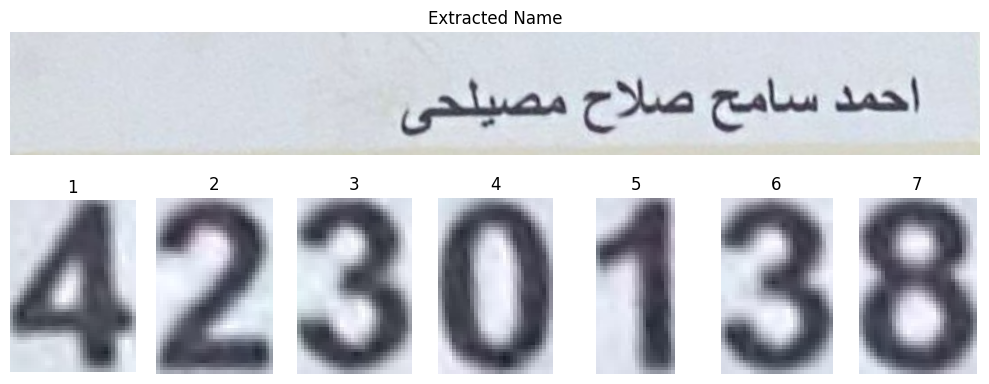

In [25]:
# 1. Load your aligned image
# (Assuming 'aligned_card' is already defined from your SIFT function, 
# or load it directly for testing)
# aligned_card = cv2.imread('imgs/ID0.jpg') 

# 2. CALL THE FUNCTION
filename = "imgs/ID0.jpg"

aligned_card = align_images_sift(filename, 'imgs/ID14.jpg')

name_image, list_of_digits = extract_name_and_digits(aligned_card)

# --- Visualization Logic ---
plt.figure(figsize=(10, 4))

# Show Name
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(name_image, cv2.COLOR_BGR2RGB))
plt.title("Extracted Name")
plt.axis('off')

# Show Digits (Dynamically create subplots for however many digits were found)
if len(list_of_digits) > 0:
    for i, digit in enumerate(list_of_digits):
        # We use subplot indexing starting from row 2
        # Logic: 2 rows, max 7 cols. 
        # The position index is: TotalCols + i + 1
        plt.subplot(2, 7, 7 + i + 1) 
        plt.imshow(cv2.cvtColor(digit, cv2.COLOR_BGR2RGB))
        plt.title(f"{i+1}")
        plt.axis('off')

plt.tight_layout()
plt.show()